<a href="https://colab.research.google.com/github/larinfarhouda/bioinformatics-data-analysis/blob/main/bioinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing "Severe acute respiratory syndrome coronavirus 2" dataset which was obtained from National Library for medicine website 

In [22]:
#loading dependencies 
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import GC
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt

--------------------------------------
# record information
---------------------------------------

In [5]:
for record in SeqIO.parse("sequence.fasta","fasta"):
    print (record)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


-----------------------------------
# getting the dna sequence 
-----------------------------------

In [6]:
#reading thr Fasta file
record = SeqIO.read("sequence.fasta","fasta")
dna = record.seq
dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [7]:
# length of the sequence
len(dna)

29903

----------------------------------------------
# counting nucleotides 
-----------------------------------------------

In [20]:
#nuc = {'A' : dna.count("A"), 'T' : dna.count("T"),'G' : dna.count("G"),'C' : dna.count("C")}
nuc = {'nucs': ['A','T','C','G'] , 'counts': [dna.count("A") , dna.count("T"), dna.count("C") ,dna.count("G")] }
nuc = pd.DataFrame.from_dict(nuc)
nuc

,nucs,counts
0,A,8954
1,T,9594
2,C,5492
3,G,5863


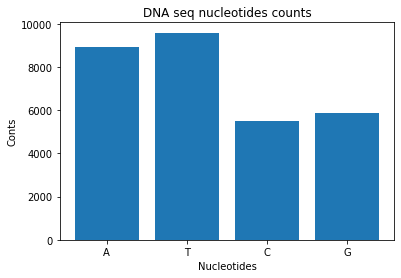

In [27]:
#Graphing the results
plt.bar(nuc ['nucs'], nuc ['counts'])
plt.xlabel("Nucleotides")
plt.ylabel("Conts")
plt.title("DNA seq nucleotides counts")
plt.show()


---------------------------------------------
# Dna transcription to MRna & translating it to protein
--------------------------------------------- 

In [30]:
#transcription "DNA => MRna"
mrna = dna.transcribe()
#add trailing N before translation to make len(sequence) not a multiple of three
mrna = mrna + Seq('N')


#translating "MRna => protien/AA"
protien = mrna.translate()

#making protien seq more readable:
protien = protien.split("*")
aminoA = [ str(i) for i in protien ] 

aminoA[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

-------------------------------------------------
# Using pandas
-------------------------------------------------

In [31]:
#creating the dataframe 
df = pd.DataFrame({'Amino_acids': aminoA})


In [37]:
# adding the length of each AA to the datafram
df['len'] = df['Amino_acids'].str.len()

#finding the largest AA
largest = df.nlargest(5,'len')
largest

,Amino_acids,len,GC %
548,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701,14.809330
694,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290,15.517241
719,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123,13.821138
695,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83,14.457831
718,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63,6.349206


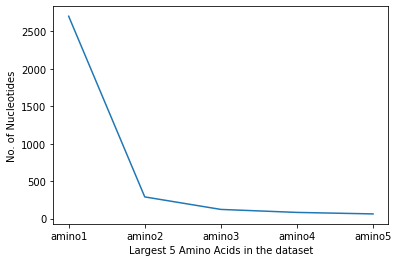

In [44]:
#plotting the result
plt.plot(['amino1','amino2','amino3','amino4','amino5'],largest['len'])
plt.xlabel("Largest 5 Amino Acids in the dataset")
plt.ylabel("No. of Nucleotides")
plt.show()


----------------------------------------------
#calulating GC contet
----------------------------------------------

In [48]:
from pandas._libs.tslibs import dtypes
df['Amino_acids'] = df['Amino_acids'].astype(str)
df['GC %'] =  [ GC(aminoA[i]) for i in range(len(aminoA)) ]
df['GC %'] = df['GC %'].round(1)
df.head()


,Amino_acids,len,GC %
0,IKGLYLPR,8,12.5
1,QTNQLSISCRSVL,13,30.8
2,TNFKICVAVTRLHA,14,7.1
3,CTHAV,5,20.0
4,LITNYCR,7,14.3


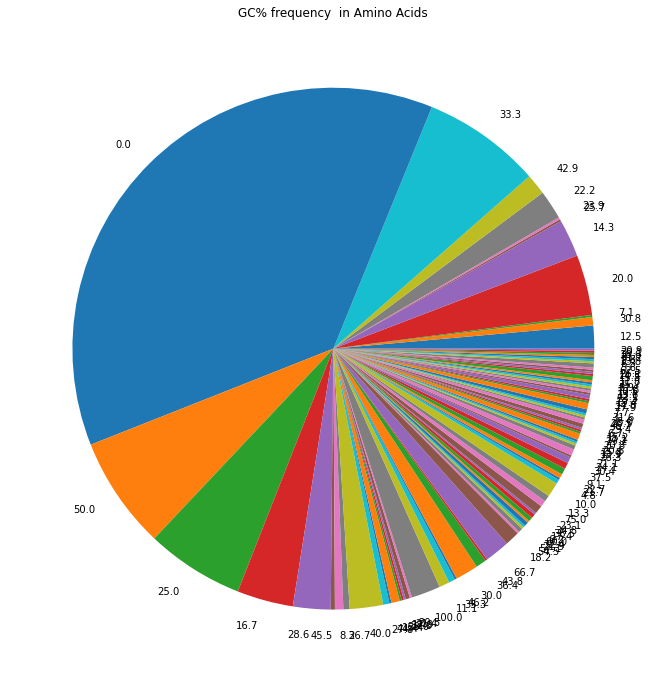

In [88]:
#ploting GC% frequency 

labels = df['GC %'].unique()
data = [(df['GC %']==labels[i]).sum() for i in range(len(labels))]

per= pd.DataFrame()
per['per'] = labels
per['freq'] = data


fig = plt.figure(figsize =(15, 12))
plt.pie(per['freq'], labels = per['per'])
plt.title("GC% frequency  in Amino Acids")

# show plot
plt.show()